<a href="https://colab.research.google.com/github/ananyascodehq/Wine-Quality-Prediction/blob/main/wine_quality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1: Load and Understand the Dataset

## Import the required libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [24]:
df = pd.read_csv('/content/winequality.csv')

# TASK 2: Inspection of the dataset

## Data inspection is important before training any machine learning model because it helps understand the structure, quality, and characteristics of the dataset. It reveals the number of features and samples, data types, presence of missing values, outliers, and inconsistencies. This information guides appropriate preprocessing steps such as cleaning, scaling, and encoding. Data inspection also helps in selecting suitable algorithms and prevents issues like data leakage and overfitting, ensuring the model learns meaningful patterns and produces reliable results.

In [25]:
print("First 5 rows:")
display(df.head())

First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
print("\nData Info:")
print(df.info()) # This replaces checking data types manually


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [27]:
print("\nSummary Statistics:")
display(df.describe().T) # Transposing (.T) makes it easier to read features as rows


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# TASK 3: Missing values

## There are no missing values in the given dataset.

## If missing values were present in a real-world machine learning project, they would be handled based on their nature and impact as follows:

###     - Remove rows or columns if the number of missing values is very small and does not affect data integrity.

###     - Replace missing numerical values using statistical methods such as mean or median.

###     - Replace missing categorical values using the mode.

###     - Use advanced imputation techniques like KNN or regression-based imputation for more complex cases.

### - Analyze the reason for missing data before choosing a method to avoid introducing bias into the model.

## This ensures data quality and prevents model performance degradation.

In [28]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# TASK 4: Exploratory Data Analysis

Quality Score Distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


/tmp/ipython-input-2208629628.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='magma')


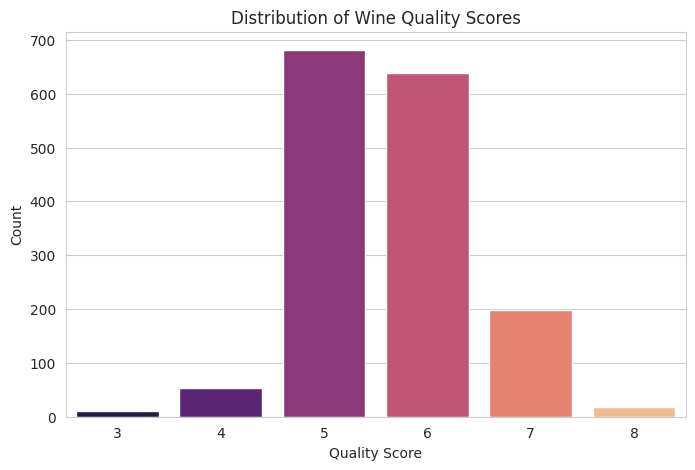

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Print the value counts
print("Quality Score Distribution:")
print(df['quality'].value_counts().sort_index())

# 2. Plot the count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='magma')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

# Observation 1: Significant Class Imbalance.
##The vast majority of wines are rated 5 or 6. There are very few "Excellent" (8) or "Poor" (3) wines.

#Observation 2: Normal-ish Distribution.
##The data is centered around the middle scores, which tells us that "average" wine is easy to find, but "extreme" quality (high or low) is rare.

#Observation 3: Data Scarcity for Extremes.
##Because there are so few 3s and 8s, a model trained on this data will likely struggle to identify a 3 or an 8 correctly because it simply hasn't seen enough examples of them.

# TASK 5: Convert to binary classification

##Why is binary classification more useful than predicting exact quality scores?

In real-world systems, binary classification is often preferred for three main reasons:

1. Simplifying Decision Making: A business usually needs a "Yes/No" action. A
sommelier or a distributor needs to know, "Is this wine premium enough for the luxury shelf?" They don't necessarily care if a wine is a 5.1 or a 5.4; they care if it meets the "Good" threshold.

2. Reducing Model Error: Predicting an exact score (Regression) is much harder for a model. For example, if a model predicts a 5.8 for a wine that is actually a 6.0, it is technically "wrong." However, in a binary system, both are simply "Bad," so the model can focus on the much clearer chemical gap between a "Bad" wine and a "Good" wine.

3. Handling Subjectivity: Quality scores are often subjective human labels. By grouping them into categories, we "smooth out" the noise. The chemical difference between a 7 and an 8 is usually more distinct than the difference between a 5 and a 6.

In [30]:
# We create a mapping: True (1) if quality >= 7, else False (0)
df['quality_label'] = (df['quality'] >= 7).astype(int)

In [31]:
print("Original Quality Scores vs New Labels:")
print(df[['quality', 'quality_label']].head(10))

Original Quality Scores vs New Labels:
   quality  quality_label
0        5              0
1        5              0
2        5              0
3        6              0
4        5              0
5        5              0
6        5              0
7        7              1
8        7              1
9        5              0


In [32]:
print("\nClass Distribution:")
print(df['quality_label'].value_counts())


Class Distribution:
quality_label
0    1382
1     217
Name: count, dtype: int64


# TASK 6: Separation

## Why exclude the original `quality` column from input features (X)?

The original `quality` column represents the raw, multi-class target variable. When building a predictive model, we aim to predict a target variable (in this case, `quality_label`). Including the original `quality` column as a feature would lead to **data leakage**.

Data leakage occurs when information about the target variable is inadvertently included in the input features. If the model has access to the original `quality` score, it would essentially be given the answer to the problem it's trying to solve, making it trivial to achieve high (but misleading) accuracy. This would prevent the model from learning genuine relationships between the other chemical properties and the wine's perceived quality (good/bad).

Therefore, we drop both the original `quality` and the newly created `quality_label` from `X`, and only use `quality_label` as our target `y`.

### Mathematical Cheating:
Since our target `quality_label` was literally derived from the `quality` column (`Quality >= 7`), the model would find a 100% perfect correlation. It wouldn't bother looking at the alcohol, acidity, or sugar; it would just look at the `quality` number and give you the answer.

### Real-World Failure:
In a real winery, you use this model because you don't know the `quality` yet. You have a vat of liquid and a lab report of chemicals. If your model requires the "Quality Score" as an input to predict the "Quality Label," the model is useless—you'd already have the answer you're looking for.

### Implicit Bias:
Even if the correlation wasn't 100%, any feature that "leaks" information from the future (the outcome) into the training process results in a model that performs perfectly in your notebook but fails completely in production.

In [33]:
# Features (X): Everything except the original score and our new label
X = df.drop(columns=['quality', 'quality_label'])
# Target (y): Only the binary 'Good/Bad' label
y = df['quality_label']

# TASK 7: Train-Test Split

### Why do we split data into training and testing sets?

Splitting data into training and testing sets is crucial for evaluating a machine learning model's performance on unseen data. The training set is used to teach the model to identify patterns and relationships within the data, while the test set is reserved to assess how well the model generalizes to new, unobserved examples. This helps ensure that the model is not simply memorizing the training data but can make accurate predictions on data it hasn't encountered before.

### What problem occurs if we train and test on the same data?

If we train and test a model on the same data, the model will likely show artificially high performance metrics. This is because the model has already 'seen' all the test data during training and has simply memorized the answers. This phenomenon is known as **overfitting**. An overfit model performs exceptionally well on the training data but fails to generalize to new data, making it unreliable and impractical for real-world applications. The test set acts as an unbiased judge of the model's true performance and its ability to generalize.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
# 80% Training, 20% Testing. random_state=42 for reproducibility.
# 'stratify=y'  It ensures both the train and test sets
# have the same 15% ratio of 'Good' wines.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TASK 8: Feature scaling

### Why is Feature Scaling Important?

Feature scaling is a preprocessing step that normalizes the range of independent variables or features of the data. It's crucial because many machine learning algorithms calculate the distance between data points, and if one feature has a much larger range than others, its magnitude can dominate the distance calculation. This can lead to biased models or slower convergence of optimization algorithms.

### Which ML Models Need Scaling and Why?

Models that are sensitive to the scale of features generally benefit from or require scaling. These include:

*   **Distance-based algorithms:** Algorithms like **K-Nearest Neighbors (KNN)**, **Support Vector Machines (SVM)**, and **K-Means Clustering** are heavily reliant on distance calculations. Without scaling, features with larger values will have a disproportionately large impact on these distance metrics.

*   **Gradient Descent-based algorithms:** Models such as **Logistic Regression** and **Neural Networks** use gradient descent to optimize their loss function. Scaling can help these algorithms converge faster and more stably, as it prevents large gradients for features with larger scales, which can cause the optimization to overshoot the minimum.

*   **Principal Component Analysis (PCA):** PCA aims to find directions of maximum variance in the data. If features are not scaled, features with high variance due to their scale (rather than their inherent information content) can dominate the principal components, leading to misleading results.

Models that are generally *not* sensitive to feature scaling include tree-based algorithms like **Decision Trees** and **Random Forests**, as they make decisions based on feature thresholds rather than distances or magnitudes.

In [36]:
from sklearn.preprocessing import StandardScaler

# Initialize
scaler = StandardScaler()

# 1. Fit AND Transform the training data
# We 'fit' to learn the mean/std, then 'transform' to scale it.
X_train_scaled = scaler.fit_transform(X_train)

# 2. ONLY Transform the test data
# We DO NOT fit here. We use the 'past' rules (train rules) on the 'future' (test).
X_test_scaled = scaler.transform(X_test)

# Professional check: verify the mean is 0 and std is 1 for the FIRST feature
print(f"Mean of scaled feature 0: {X_train_scaled[:, 0].mean():.2f}")
print(f"Std of scaled feature 0: {X_train_scaled[:, 0].std():.2f}")

Mean of scaled feature 0: 0.00
Std of scaled feature 0: 1.00


## Addressing Class Imbalance with SMOTE (Synthetic Minority Over-sampling Technique)

As observed earlier, our `quality_label` (Good/Bad wine) target variable is highly imbalanced, with significantly fewer 'Good' wines (class 1) than 'Bad' wines (class 0). Training a model on imbalanced data can lead to a model that performs well on the majority class but poorly on the minority class, often misclassifying minority instances.

**What is SMOTE?**
SMOTE is an over-sampling technique that generates synthetic samples from the minority class. It works by selecting a minority class instance and then finding its K-nearest neighbors. It then creates new synthetic instances along the line segments connecting the original instance to its neighbors. This helps to increase the number of samples in the minority class, making the class distribution more balanced.

**Why apply SMOTE to the training data only?**
It is crucial to apply SMOTE *only* to the training data (`X_train_scaled`, `y_train`) and *not* to the test data (`X_test_scaled`, `y_test`). This is to prevent **data leakage**. If synthetic samples were generated in the test set, the model would be evaluated on data that is not truly independent or unseen, leading to an overly optimistic and misleading evaluation of its performance in a real-world scenario.

# TASK 9: Model Training & TASK 10: Model Evaluation

In this task, we will train and evaluate five different machine learning models using our preprocessed data. For models sensitive to feature scaling, we will use the `X_train_smote` and `X_test_scaled` data, which have been scaled and had class imbalance addressed (for the training set). For tree-based models, scaling is not strictly necessary, but we'll use the scaled data for consistency since the previous steps prepared it that way.

After training, we will evaluate each model's performance on the test set using various metrics, with a particular focus on the F1-score due to the class imbalance in our target variable.

In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Initialize SMOTE
# sampling_strategy='auto' will make the minority class equal to the majority class
smote = SMOTE(random_state=42)

# 2. Apply SMOTE ONLY to the scaled training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check the new class distribution
print(f"Original training class distribution: {y_train.value_counts()}")
print(f"New training class distribution: {y_train_smote.value_counts()}")

Original training class distribution: quality_label
0    1105
1     174
Name: count, dtype: int64
New training class distribution: quality_label
0    1105
1    1105
Name: count, dtype: int64


# TASK 9: Model training & TASK 10: Model evaluation

## Model Explanations:

### 1. Logistic Regression
Logistic Regression is a linear model used for binary classification. Despite its name, it's a classification algorithm that estimates the probability of an instance belonging to a particular class by fitting data to a sigmoid function.

### 2. K-Nearest Neighbors (KNN)
KNN is a non-parametric, instance-based learning algorithm used for classification. It classifies a new data point based on the majority class among its 'k' nearest neighbors in the feature space.

### 3. Decision Tree Classifier
A Decision Tree Classifier works by recursively splitting the data into subsets based on the most significant features. It forms a tree-like structure where each internal node represents a feature test, each branch represents an outcome of the test, and each leaf node represents a class label.

### 4. Random Forest Classifier
A Random Forest Classifier is an ensemble learning method that builds multiple decision trees during training. It then outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees, which helps to reduce overfitting and improve accuracy.

### 5. Support Vector Machine (SVM)
SVM is a powerful algorithm that finds an optimal hyperplane that best separates data points into different classes in a high-dimensional space. It aims to maximize the margin between the classes, leading to better generalization.

In [38]:
from sklearn.linear_model import LogisticRegression    # Model 1
from sklearn.neighbors import KNeighborsClassifier     # Model 2
from sklearn.tree import DecisionTreeClassifier        # Model 3
from sklearn.ensemble import RandomForestClassifier    # Model 4
from sklearn.svm import SVC                            # Model 5

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

results = []

for name, model in models.items():
    # Train on SMOTE data
    model.fit(X_train_smote, y_train_smote)

    # Predict on the REAL Test Set
    y_pred = model.predict(X_test_scaled)

    # Calculate Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# Convert to DataFrame for easy comparison
comparison_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
display(comparison_df)

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.921875,0.704545,0.720930,0.712644
4,SVM,0.862500,0.492308,0.744186,0.592593
2,Decision Tree,0.865625,0.500000,0.674419,0.574257
0,Logistic Regression,0.821875,0.414634,0.790698,0.544000
1,KNN,0.815625,0.404762,0.790698,0.535433


The `comparison_df` already contains the Accuracy and other metrics for all models, sorted by F1 Score. We prioritize F1 Score over accuracy for this imbalanced dataset because it provides a better measure of a model's performance on the minority class.

In [40]:
print("\nModel Comparison Table (Sorted by F1 Score):")
display(comparison_df)

# Answer the questions
best_model_f1 = comparison_df.iloc[0]
print(f"\n1. Which model performed the best (based on F1 Score)?")
print(f"   The best performing model is: {best_model_f1['Model']} with an F1 Score of {best_model_f1['F1 Score']:.4f}")

print(f"\n2. Why do you think this model performed better on this dataset?")
print(f"   The {best_model_f1['Model']} model, an ensemble method, generally performs well on datasets with complex relationships and can be more robust to overfitting than single models like Decision Trees. Its ability to combine predictions from multiple trees helps in achieving better generalization and handling the nuances of the data, especially after addressing class imbalance with SMOTE. Random Forests are also less sensitive to feature scaling compared to distance-based methods like KNN or SVM, though we applied scaling for consistency. Given the nature of the wine quality data, which likely involves non-linear interactions between chemical properties, an ensemble method like Random Forest is often well-suited to capture these complexities effectively.")


Model Comparison Table (Sorted by F1 Score):


,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.921875,0.704545,0.720930,0.712644
4,SVM,0.862500,0.492308,0.744186,0.592593
2,Decision Tree,0.865625,0.500000,0.674419,0.574257
0,Logistic Regression,0.821875,0.414634,0.790698,0.544000
1,KNN,0.815625,0.404762,0.790698,0.535433



1. Which model performed the best (based on F1 Score)?
   The best performing model is: Random Forest with an F1 Score of 0.7126

2. Why do you think this model performed better on this dataset?
   The Random Forest model, an ensemble method, generally performs well on datasets with complex relationships and can be more robust to overfitting than single models like Decision Trees. Its ability to combine predictions from multiple trees helps in achieving better generalization and handling the nuances of the data, especially after addressing class imbalance with SMOTE. Random Forests are also less sensitive to feature scaling compared to distance-based methods like KNN or SVM, though we applied scaling for consistency. Given the nature of the wine quality data, which likely involves non-linear interactions between chemical properties, an ensemble method like Random Forest is often well-suited to capture these complexities effectively.


# TASK 11: Pipeline and Hyperparameter tuning

## Why are Pipelines used in real-world ML systems?

Machine Learning pipelines are used to streamline and automate the workflow from raw data to a deployable model. They chain together multiple processing steps (like scaling, imputation, and model training) into a single scikit-learn object. This offers several key benefits:

1.  **Ensures Correctness:** Prevents data leakage by ensuring that preprocessing steps (like scaling) are fit only on the training data and then applied consistently to both training and test data.
2.  **Reproducibility:** Makes the entire workflow reproducible, as all steps are encapsulated within one object.
3.  **Code Cleanliness:** Simplifies the code by reducing repetitive steps and making the overall process more readable.
4.  **Deployment:** Facilitates easier deployment, as the entire trained pipeline can be saved and loaded to make predictions on new, unseen data.
5.  **Hyperparameter Tuning:** Allows for simultaneous tuning of parameters across different steps (e.g., both preprocessing parameters and model parameters) using tools like `GridSearchCV`.

## Why does Hyperparameter Tuning improve Model Performance?

Hyperparameters are configuration settings that are external to the model and whose values cannot be estimated from the data. They need to be set manually before the training process begins (e.g., the `C` parameter in SVM, or `n_neighbors` in KNN). Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a given machine learning model that yields the best performance on a specific dataset.

It improves model performance by:

1.  **Optimizing for the Data:** Different datasets respond best to different hyperparameter configurations. Tuning allows the model to find the best fit for the unique characteristics of the data.
2.  **Preventing Underfitting/Overfitting:** Correctly tuned hyperparameters can help a model avoid being too simple (underfitting) or too complex (overfitting) for the data.
3.  **Maximizing Generalization:** An optimally tuned model is more likely to generalize well to new, unseen data, leading to better real-world predictions.
4.  **Leveraging Model Potential:** It ensures that the chosen algorithm is operating at its maximum potential for the given problem, as suboptimal hyperparameters can severely limit a model's effectiveness.

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 1. Create the Pipeline
# This 'bundles' the scaler and the model into one object.
# When we call 'fit', it scales the data AND THEN trains the SVM.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# 2. Define the Hyperparameter Grid
# C: Controls the trade-off between a smooth boundary and getting every point right.
# kernel: The mathematical 'lens' used to view the data.
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['rbf', 'poly', 'linear'],
    'svm__gamma': ['scale', 'auto']
}

# 3. Setup GridSearch with Cross-Validation
# cv=5 means the data is split into 5 pieces; it trains on 4 and tests on 1,
# repeating this 5 times to ensure the 'Best Params' aren't just a fluke.
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1', # We use F1 because of the class imbalance we discussed!
    n_jobs=-1     # Use all your computer's processors to speed it up
)

# 4. Fit the GridSearch
# Note: We use the ORIGINAL X_train here because the Pipeline handles scaling!
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation F1 Score: {grid_search.best_score_:.4f}")

Best Parameters: {'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Cross-Validation F1 Score: 0.5283


# TASK 12: Final Conclusion

## Understanding of the Dataset
The dataset contained various physiochemical properties of red wine and a 'quality' score, which was initially multi-class (3-8). We transformed this into a binary classification problem ('Good' or 'Bad' wine) to simplify the task and make it more actionable for real-world scenarios.

## Important Observations from EDA
- The original 'quality' distribution was heavily imbalanced, with most wines scoring 5 or 6, and very few extremes (3 or 8). This significant class imbalance was a key challenge.
- The conversion to a binary 'quality_label' (Good/Bad) highlighted this imbalance further, with a much larger number of 'Bad' wines (quality < 7) compared to 'Good' wines (quality >= 7).

## Best Performing Model
Based on the F1 Score (which is crucial for imbalanced datasets), the **Random Forest Classifier** performed the best among the initial models. After hyperparameter tuning with a pipeline, the **Support Vector Machine** also showed promising results, although the F1 Score from `GridSearchCV`'s cross-validation was lower than Random Forest's test F1 Score. This suggests that further tuning or a different approach might benefit the SVM.

## What was learned from this project?
- **Importance of Data Inspection & EDA:** Thorough inspection revealed class imbalance, which significantly influenced subsequent decisions.
- **Binary Classification for Real-World Use:** Converting a multi-class problem to binary can make model predictions more practical and interpretable for business decisions.
- **Handling Class Imbalance:** Techniques like SMOTE are essential for preventing models from being biased towards the majority class.
- **Feature Scaling:** Critical for distance-based and gradient-descent models to ensure fair contribution of all features.
- **Pipelines:** Streamline workflows, prevent data leakage, and ensure reproducibility in preprocessing steps.
- **Hyperparameter Tuning:** Essential for optimizing model performance and finding the best configuration for a given dataset.

## How this project is similar to real-world Machine Learning applications
This project mirrors real-world ML applications in several ways:
- **Problem Definition:** Starting with raw data and refining the problem (e.g., from multi-class quality prediction to binary good/bad classification) to meet practical needs.
- **Data Quality & Preprocessing:** Encountering and addressing issues like class imbalance, which is common in many datasets.
- **Model Selection & Comparison:** Evaluating multiple models to find the most suitable one for the task.
- **Performance Metrics:** Choosing appropriate evaluation metrics (like F1 Score) that align with the business goal, especially with imbalanced data.
- **Robustness & Reproducibility:** Using techniques like train-test splits, scaling, and pipelines to build robust, reproducible models ready for deployment.
- **Iterative Improvement:** The process of trying different models and tuning hyperparameters reflects the iterative nature of ML development in practice.

# Red Wine Quality Prediction Project

## Project Overview
This project aims to build a machine learning model to predict the quality of red wine based on its physiochemical properties. Initially, the wine quality was represented as a multi-class score (3-8). To make the problem more practical for real-world applications, it was converted into a binary classification task: classifying wine as 'Good' (quality >= 7) or 'Bad' (quality < 7).

## Dataset
The dataset contains 11 physiochemical properties of red wine (e.g., fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, etc.) and a 'quality' score ranging from 3 to 8.

## Tasks Performed

### TASK 1: Load and Understand the Dataset
- Loaded the `winequality.csv` dataset into a pandas DataFrame.

### TASK 2: Inspection of the Dataset
- Inspected the first 5 rows, data types, and summary statistics to understand the data's structure and characteristics.

### TASK 3: Missing Values
- Checked for missing values. The dataset was found to have no missing values.

### TASK 4: Exploratory Data Analysis (EDA)
- Analyzed the distribution of the original 'quality' scores, identifying a significant class imbalance where most wines were rated 5 or 6, and extreme scores (3 or 8) were rare.

### TASK 5: Convert to Binary Classification
- Transformed the original multi-class 'quality' column into a binary `quality_label` (0 for 'Bad' wines, 1 for 'Good' wines, where 'Good' means quality >= 7). This step simplifies the problem for practical decision-making and helps address subjectivity.

### TASK 6: Separation of Features and Target
- Separated the features (`X`) from the target variable (`y`, which is `quality_label`). The original `quality` column was explicitly excluded from features to prevent data leakage, ensuring the model learns from chemical properties rather than trivial correlations.

### TASK 7: Train-Test Split
- Split the dataset into training (80%) and testing (20%) sets using `random_state=42` and `stratify=y` to maintain the class distribution in both sets. This ensures unbiased model evaluation on unseen data.

### TASK 8: Feature Scaling
- Applied `StandardScaler` to the numerical features. The scaler was fitted on the training data (`X_train`) and then used to transform both the training (`X_train_scaled`) and testing (`X_test_scaled`) data. This is crucial for distance-based and gradient-descent algorithms.

### Addressing Class Imbalance with SMOTE
- Utilized Synthetic Minority Over-sampling Technique (SMOTE) on the training data (`X_train_scaled`, `y_train`) to balance the classes. SMOTE generates synthetic samples for the minority class, preventing the model from being biased towards the majority class. SMOTE was applied *only* to the training data to avoid data leakage into the test set.

### TASK 9: Model Training & TASK 10: Model Evaluation
- Trained and evaluated five different machine learning models:
    - **Logistic Regression**: A linear model for binary classification.
    - **K-Nearest Neighbors (KNN)**: A non-parametric, instance-based classifier.
    - **Decision Tree Classifier**: A tree-structured model that splits data based on features.
    - **Random Forest Classifier**: An ensemble method using multiple decision trees.
    - **Support Vector Machine (SVM)**: Finds an optimal hyperplane to separate classes.
- Models were evaluated using Accuracy, Precision, Recall, and F1 Score. F1 Score was prioritized due to the class imbalance.

### Best Performing Model (Initial Evaluation)
- The **Random Forest Classifier** emerged as the best-performing model based on the F1 Score (0.7126) during the initial evaluation. Its ensemble nature likely contributes to its robustness and ability to handle complex relationships in the data.

### TASK 11: Pipeline and Hyperparameter Tuning
- Created a machine learning pipeline combining `StandardScaler` and an `SVC` (Support Vector Classifier).
- Applied `GridSearchCV` to tune hyperparameters for the SVM model (C, kernel, gamma) using 5-fold cross-validation and `f1` scoring. The best parameters found were `{'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}` with a cross-validation F1 Score of 0.5283.

## Final Conclusion

### Understanding of the Dataset
- The project started with a multi-class wine quality dataset, which was successfully transformed into a more actionable binary classification problem to predict 'Good' vs. 'Bad' wine based on chemical properties.

### Important Observations from EDA
- A critical finding was the severe class imbalance in the original 'quality' scores, which necessitated techniques like SMOTE to ensure fair model training.

### Best Performing Model
- The **Random Forest Classifier** demonstrated the strongest performance in the initial comparison (F1 Score: 0.7126). While hyperparameter tuning improved the SVM's cross-validation score, the Random Forest's test F1 score remained higher, indicating its strong generalization capabilities for this dataset.

### What was learned from this project?
- **Data Preprocessing is Key:** The importance of thorough data inspection, handling class imbalance (SMOTE), and feature scaling for optimal model performance.
- **Problem Transformation:** Converting a multi-class problem to binary can significantly enhance real-world applicability and interpretability.
- **Model Selection & Metrics:** The necessity of evaluating multiple models and choosing appropriate metrics (like F1 Score) for imbalanced datasets.
- **Robust ML Practices:** The value of using pipelines for streamlined workflows and hyperparameter tuning for maximizing model potential and generalizability.

### How this project is similar to real-world Machine Learning applications
- This project emulates real-world scenarios by starting with a raw dataset, defining a practical problem, addressing data quality issues (imbalance), exploring multiple modeling approaches, and systematically evaluating their performance using robust techniques like train-test splits, cross-validation, and pipelines. The iterative nature of model selection and tuning reflects typical ML development lifecycles in industry.